In [8]:
import pandas as pd
import numpy as np

df=pd.read_csv('house_data_fs.csv', index_col = 0)
df = df.dropna()
print(df.shape)
df1 = df.head(50)

(21600, 3)


### Linear regression model using a single feature

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#define and feature and target variables
X = df1['sqft_living'].values
y = df1['price'].values

#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

#train with linear regression model
lr = LinearRegression()
model = lr.fit(X_scaled, y)
print(model.coef_, model.intercept_)

# calculate r2score, mae amd mse
y_pred = model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rscore = lr.score(X_scaled, y)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', np.round(rscore, 2))

[211051.60498044] 532438.6
Mean Squared Error: 62185849719.2222
Mean Absolute Error: 161171.373785871
R2 Score: 0.42


### Visualization for Linear Regression model

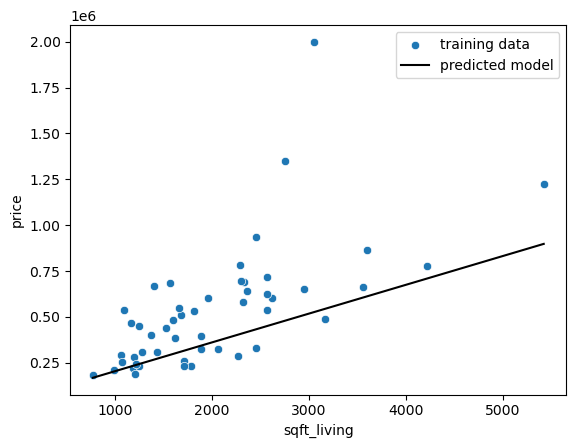

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 1000)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

In [11]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation 
order = 5
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

# Modeling. 
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)


print('r2-score:', np.round(rscore, 2), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))


[303012.02984126 191876.41167818 -44143.55845641 -79088.84962854
  19894.7415532 ] 495512.639159131
r2-score: 0.48 
mean squared error: 55715230172.0 
mean absolute error: 161830.0


### Visualization for Poly regression

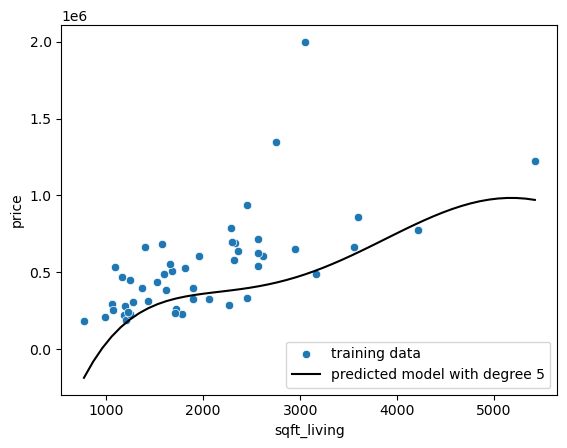

In [12]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(order)])
plt.show()

### Saving Best Model for Deployment

In [13]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)


print('r2-score:', np.round(rscore, 2), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))

r2-score: 0.43 
mean squared error: 60999286388.0 
mean absolute error: 157625.0
